# Model Selection

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the linear models from scikit-learn
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor

%matplotlib inline

## BIO

In [37]:
##Load the data 
BIO_train_0 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_train_group0_2020-03-02_2020-12-31.csv",index_col=[0])
print('Train:', BIO_train_0['Report Date'].iloc[0], 'to',BIO_train_0['Report Date'].iloc[-1])
print('Shape', BIO_train_0.shape)


BIO_test_0 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_test_group0_2021-01-01_2021-06-30.csv",index_col=[0])
print('Test:', BIO_test_0['Report Date'].min(), 'to',BIO_test_0['Report Date'].max())
print('Shape', BIO_test_0.shape)

Train: 2020-03-02 to 2020-12-31
Shape (305, 28)
Test: 2021-01-01 to 2021-06-30
Shape (181, 28)


In [38]:
BIO_train_0['Return'] = BIO_train_0['Stock price'].pct_change()
BIO_train_0['Next Day Return'] = BIO_train_0['Return'].shift(-1)
BIO_train_0['Next Day Y_boolean'] = BIO_train_0['Y_boolean'].shift(-1)
BIO_train_0 = BIO_train_0.iloc[:-1]

BIO_test_0['Return'] = BIO_test_0['Stock price'].pct_change()
BIO_test_0['Next Day Return'] = BIO_test_0['Return'].shift(-1)
BIO_test_0['Next Day Y_boolean'] = BIO_test_0['Y_boolean'].shift(-1)
BIO_test_0 = BIO_test_0.iloc[:-1]

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

BIO_train_0_features = BIO_train_0.iloc[:,4:7]
BIO_train_0_target =BIO_train_0["Next Day Y_boolean"]
BIO_test_0_features = BIO_test_0.iloc[:,4:7]
BIO_test_0_target =BIO_test_0["Next Day Y_boolean"]

rf = RandomForestClassifier(random_state=0, 
                            n_jobs=-1, 
                            n_estimators=100,
                            class_weight='balanced'
                           )
model = rf.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))

training score 0.3881578947368421
testing score 0.38333333333333336


In [40]:
def train(n,train_features,train_target,test_features,test_target):
    rf = RandomForestClassifier(random_state= 0, 
                            n_jobs=-1, 
                            n_estimators=n,
                            class_weight='balanced'
                           )
    model = rf.fit(train_features,train_target)
    training_score =  model.score(train_features,train_target)
    testing_score = model.score(test_features,test_target)
    return training_score,testing_score
    

In [41]:
 train(100,BIO_train_0_features,BIO_train_0_target,BIO_test_0_features,BIO_test_0_target)

(0.3881578947368421, 0.38333333333333336)

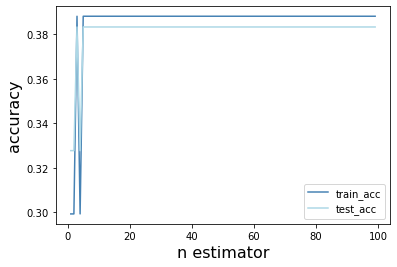

In [42]:
train_results = []
test_results = []

for n_estimators in range(1,100):
    train_acc, test_acc = train(n_estimators,BIO_train_0_features,BIO_train_0_target,BIO_test_0_features,BIO_test_0_target)
    train_results.append(train_acc)
    test_results.append(test_acc)

plt.plot(range(1,100),train_results,color="steelblue", label= "train_acc")
plt.plot(range(1,100),test_results,color="lightblue", label="test_acc")
plt.xlabel("n estimator", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.legend()
    

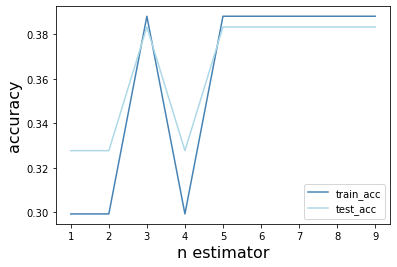

In [43]:
train_results = []
test_results = []

for n_estimators in range(1,10):
    train_acc, test_acc = train(n_estimators,BIO_train_0_features,BIO_train_0_target,BIO_test_0_features,BIO_test_0_target)
    train_results.append(train_acc)
    test_results.append(test_acc)

plt.plot(range(1,10),train_results,color="steelblue", label= "train_acc")
plt.plot(range(1,10),test_results,color="lightblue", label="test_acc")
plt.xlabel("n estimator", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.legend()
    
    


In [44]:
BIO_train_1 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_train_group1_2020-06-01_2021-03-31.csv",index_col=[0])
print('Train:', BIO_train_1['Report Date'].min(), 'to',BIO_train_1['Report Date'].max())
print('Shape', BIO_train_1.shape)
BIO_test_1 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_test_group1_2021-04-01_2021-09-30.csv",index_col=[0])
print('Test:', BIO_test_1['Report Date'].min(), 'to',BIO_test_1['Report Date'].max())
print('Shape', BIO_test_1.shape)

Train: 2020-06-01 to 2021-03-31
Shape (304, 28)
Test: 2021-04-01 to 2021-09-30
Shape (183, 28)


In [45]:
BIO_train_1_features = BIO_train_1.iloc[:,7:18]
BIO_train_1_target =BIO_train_1["Y_boolean"]
BIO_test_1_features = BIO_test_1.iloc[:,7:18]
BIO_test_1_target =BIO_test_1["Y_boolean"]

rf = RandomForestClassifier(random_state=0, 
                            n_jobs=-1, 
                            n_estimators=100,
                            class_weight='balanced'
                           )
model = rf.fit(BIO_train_1_features,BIO_train_1_target)
print("training score" , model.score(BIO_train_1_features,BIO_train_1_target))
print("testing score" , model.score(BIO_test_1_features,BIO_test_1_target))

training score 0.3684210526315789
testing score 0.32786885245901637


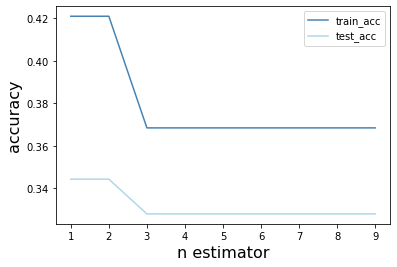

In [46]:
train_results = []
test_results = []

for n_estimators in range(1,10):
    train_acc, test_acc = train(n_estimators,BIO_train_1_features,BIO_train_1_target,BIO_test_1_features,BIO_test_1_target)
    train_results.append(train_acc)
    test_results.append(test_acc)

plt.plot(range(1,10),train_results,color="steelblue", label= "train_acc")
plt.plot(range(1,10),test_results,color="lightblue", label="test_acc")
plt.xlabel("n estimator", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.legend()
    

In [50]:
BIO_train_2 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_train_group2_2020-09-01_2021-06-30.csv",index_col=[0])
print('Train:', BIO_train_2['Report Date'].min(), 'to',BIO_train_2['Report Date'].max())
print('Shape', BIO_train_2.shape)
BIO_test_2 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_test_group2_2021-07-01_2021-12-31.csv",index_col=[0])
print('Test:', BIO_test_2['Report Date'].min(), 'to',BIO_test_2['Report Date'].max())
print('Shape', BIO_test_2.shape)

Train: 2020-09-01 to 2021-06-30
Shape (303, 28)
Test: 2021-07-01 to 2021-12-31
Shape (184, 28)


In [51]:
BIO_train_2_features = BIO_train_2.iloc[:,3:13]
BIO_train_2_target =BIO_train_2["Y_boolean"]
BIO_test_2_features = BIO_test_2.iloc[:,3:13]
BIO_test_2_target =BIO_test_2["Y_boolean"]

model = rf.fit(BIO_train_2_features,BIO_train_2_target)
print("training score" , model.score(BIO_train_2_features,BIO_train_2_target))
print("testing score" , model.score(BIO_test_2_features,BIO_test_2_target))

training score 0.45874587458745875
testing score 0.34782608695652173


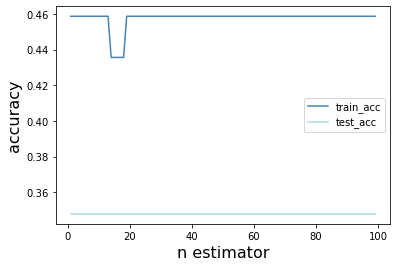

In [53]:
train_results = []
test_results = []

for n_estimators in range(1,100):
    train_acc, test_acc = train(n_estimators,BIO_train_2_features,BIO_train_2_target,BIO_test_2_features,BIO_test_2_target)
    train_results.append(train_acc)
    test_results.append(test_acc)

plt.plot(range(1,100),train_results,color="steelblue", label= "train_acc")
plt.plot(range(1,100),test_results,color="lightblue", label="test_acc")
plt.xlabel("n estimator", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.legend()
    

In [54]:
BIO_train_3 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_train_group3_2021-01-01_2021-09-30.csv",index_col=[0])
print('Train:', BIO_train_3['Report Date'].min(), 'to',BIO_train_3['Report Date'].max())
print('Shape', BIO_train_3.shape)
BIO_test_3 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_test_group3_2021-10-01_2022-04-24.csv",index_col=[0])
print('Test:', BIO_test_3['Report Date'].min(), 'to',BIO_test_3['Report Date'].max())
print('Shape', BIO_test_3.shape)

Train: 2021-01-01 to 2021-09-30
Shape (273, 28)
Test: 2021-10-01 to 2022-04-24
Shape (206, 28)


In [55]:
BIO_train_3_features = BIO_train_3.iloc[:,3:18]
BIO_train_3_target =BIO_train_3["Y_boolean"]
BIO_test_3_features = BIO_test_3.iloc[:,3:18]
BIO_test_3_target =BIO_test_3["Y_boolean"]

model = rf.fit(BIO_train_3_features,BIO_train_3_target)
print("training score" , model.score(BIO_train_3_features,BIO_train_3_target))
print("testing score" , model.score(BIO_test_3_features,BIO_test_3_target))

training score 0.45787545787545786
testing score 0.4029126213592233


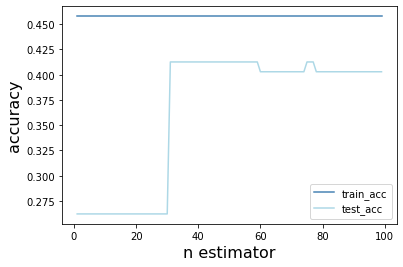

In [58]:
train_results = []
test_results = []

for n_estimators in range(1,100):
    train_acc, test_acc = train(n_estimators,BIO_train_3_features,BIO_train_3_target,BIO_test_3_features,BIO_test_3_target)
    train_results.append(train_acc)
    test_results.append(test_acc)

plt.plot(range(1,100),train_results,color="steelblue", label= "train_acc")
plt.plot(range(1,100),test_results,color="lightblue", label="test_acc")
plt.xlabel("n estimator", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.legend()

In [56]:
BIO_train_4 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_train_group4_2021-03-01_2021-12-31.csv",index_col=[0])
print('Train:', BIO_train_4['Report Date'].min(), 'to',BIO_train_4['Report Date'].max())
print('Shape', BIO_train_4.shape)
BIO_test_4 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/bio_test_group4_2022-01-01_2022-04-24.csv",index_col=[0])
print('Test:', BIO_test_4['Report Date'].min(), 'to',BIO_test_4['Report Date'].max())
print('Shape', BIO_test_4.shape)

Train: 2021-03-01 to 2021-12-31
Shape (306, 28)
Test: 2022-01-01 to 2022-04-24
Shape (114, 28)


In [57]:
BIO_train_4_features = BIO_train_4.iloc[:,3:10]
BIO_train_4_target =BIO_train_4["Y_boolean"]
BIO_test_4_features = BIO_test_4.iloc[:,3:10]
BIO_test_4_target =BIO_test_4["Y_boolean"]

model = rf.fit(BIO_train_4_features,BIO_train_4_target)
print("training score" , model.score(BIO_train_4_features,BIO_train_4_target))
print("testing score" , model.score(BIO_test_4_features,BIO_test_4_target))

training score 0.40522875816993464
testing score 0.47368421052631576


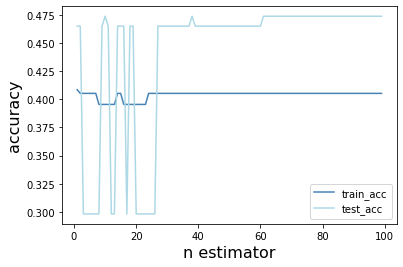

In [59]:
train_results = []
test_results = []

for n_estimators in range(1,100):
    train_acc, test_acc = train(n_estimators,BIO_train_4_features,BIO_train_4_target,BIO_test_4_features,BIO_test_4_target)
    train_results.append(train_acc)
    test_results.append(test_acc)

plt.plot(range(1,100),train_results,color="steelblue", label= "train_acc")
plt.plot(range(1,100),test_results,color="lightblue", label="test_acc")
plt.xlabel("n estimator", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.legend()

## Logistic Regression 

In [1]:
log_l2 = make_pipeline(LogisticRegression(max_iter=1000, penalty='l2', tol=0.001, solver='newton-cg'))
model = log_l2.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))

NameError: name 'make_pipeline' is not defined

In [62]:
# RobustScaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
log_l2 = make_pipeline(RobustScaler(), LogisticRegression(max_iter=1000, penalty='l2', tol=0.001, solver='newton-cg'))
model = log_l2.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))


training score 0.45723684210526316
testing score 0.38333333333333336


In [27]:
model =log_l2.fit(BIO_train_1_features,BIO_train_1_target)
print("training score" , model.score(BIO_train_1_features,BIO_train_1_target))
print("testing score" , model.score(BIO_test_1_features,BIO_test_1_target))

training score 0.4440789473684211
testing score 0.32786885245901637


In [28]:
model = log_l2.fit(BIO_train_2_features,BIO_train_2_target)
print("training score" , model.score(BIO_train_2_features,BIO_train_2_target))
print("testing score" , model.score(BIO_test_2_features,BIO_test_2_target))

training score 0.45874587458745875
testing score 0.34782608695652173


In [29]:
model =log_l2.fit(BIO_train_3_features,BIO_train_3_target)
print("training score" , model.score(BIO_train_3_features,BIO_train_3_target))
print("testing score" , model.score(BIO_test_3_features,BIO_test_3_target))

training score 0.45787545787545786
testing score 0.41262135922330095


In [30]:
model = log_l2.fit(BIO_train_4_features,BIO_train_4_target)
print("training score" , model.score(BIO_train_4_features,BIO_train_4_target))
print("testing score" , model.score(BIO_test_4_features,BIO_test_4_target))

training score 0.4150326797385621
testing score 0.2982456140350877


In [31]:
sgdc_j = SGDClassifier(alpha=0.0001, epsilon=0.01, eta0=0.5, random_state=12345)
model = sgdc_j.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))

training score 0.27631578947368424
testing score 0.34444444444444444


In [32]:
model = sgdc_j.fit(BIO_train_1_features,BIO_train_1_target)
print("training score" , model.score(BIO_train_1_features,BIO_train_1_target))
print("testing score" , model.score(BIO_test_1_features,BIO_test_1_target))

training score 0.4407894736842105
testing score 0.32786885245901637


In [33]:
model = sgdc_j.fit(BIO_train_2_features,BIO_train_2_target)
print("training score" , model.score(BIO_train_2_features,BIO_train_2_target))
print("testing score" , model.score(BIO_test_2_features,BIO_test_2_target))

training score 0.31683168316831684
testing score 0.34782608695652173


In [34]:
model = sgdc_j.fit(BIO_train_3_features,BIO_train_3_target)
print("training score" , model.score(BIO_train_3_features,BIO_train_3_target))
print("testing score" , model.score(BIO_test_3_features,BIO_test_3_target))

training score 0.39194139194139194
testing score 0.39805825242718446


In [35]:
model = sgdc_j.fit(BIO_train_4_features,BIO_train_4_target)
print("training score" , model.score(BIO_train_4_features,BIO_train_4_target))
print("testing score" , model.score(BIO_test_4_features,BIO_test_4_target))


training score 0.37254901960784315
testing score 0.47368421052631576


## Support Vector Machine (SVM)

In [36]:
svm = make_pipeline(RobustScaler(), SVC(gamma='auto'))
model = svm.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))

training score 0.45723684210526316
testing score 0.38333333333333336


In [37]:
model = svm.fit(BIO_train_1_features,BIO_train_1_target)
print("training score" , model.score(BIO_train_1_features,BIO_train_1_target))
print("testing score" , model.score(BIO_test_1_features,BIO_test_1_target))

training score 0.4407894736842105
testing score 0.32786885245901637


In [38]:
model = svm.fit(BIO_train_2_features,BIO_train_2_target)
print("training score" , model.score(BIO_train_2_features,BIO_train_2_target))
print("testing score" , model.score(BIO_test_2_features,BIO_test_2_target))

training score 0.44554455445544555
testing score 0.34782608695652173


In [39]:
model = svm.fit(BIO_train_3_features,BIO_train_3_target)
print("training score" , model.score(BIO_train_3_features,BIO_train_3_target))
print("testing score" , model.score(BIO_test_3_features,BIO_test_3_target))

training score 0.4542124542124542
testing score 0.27184466019417475


In [40]:
model = svm.fit(BIO_train_4_features,BIO_train_4_target)
print("training score" , model.score(BIO_train_4_features,BIO_train_4_target))
print("testing score" , model.score(BIO_test_4_features,BIO_test_4_target))


training score 0.4150326797385621
testing score 0.2982456140350877


# ZTS

In [42]:
## Random Forest
ZTS_train_0 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_train_group0_2020-03-02_2020-12-31.csv",index_col=[0])
print('Train:', ZTS_train_0['Report Date'].min(), 'to',ZTS_train_0['Report Date'].max())
print('Shape', ZTS_train_0.shape)
ZTS_test_0 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_test_group0_2021-01-01_2021-06-30.csv",index_col=[0])
print('Test:',ZTS_test_0['Report Date'].min(), 'to',ZTS_test_0['Report Date'].max())
print('Shape', ZTS_test_0.shape)


Train: 2020-03-02 to 2020-12-31
Shape (305, 28)
Test: 2021-01-01 to 2021-06-30
Shape (181, 28)


In [43]:
ZTS_train_0_features = ZTS_train_0.iloc[:,3:11]
ZTS_train_0_target = ZTS_train_0["Y_boolean"]
ZTS_test_0_features = ZTS_test_0.iloc[:,3:11]
ZTS_test_0_target =ZTS_test_0["Y_boolean"]

model = rf.fit(ZTS_train_0_features,ZTS_train_0_target)
print("training score" , model.score(ZTS_train_0_features,ZTS_train_0_target))
print("testing score" , model.score(ZTS_test_0_features,ZTS_test_0_target))

training score 0.3704918032786885
testing score 0.36464088397790057


In [44]:
ZTS_train_1 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_train_group1_2020-06-01_2021-03-31.csv",index_col=[0])
print('Train:', ZTS_train_1['Report Date'].min(), 'to',ZTS_train_1['Report Date'].max())
print('Shape', ZTS_train_1.shape)
ZTS_test_1 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_test_group1_2021-04-01_2021-09-30.csv",index_col=[0])
print('Test:',ZTS_test_1['Report Date'].min(), 'to',ZTS_test_1['Report Date'].max())
print('Shape', ZTS_test_1.shape)

Train: 2020-06-01 to 2021-03-31
Shape (304, 28)
Test: 2021-04-01 to 2021-09-30
Shape (183, 28)


In [45]:
ZTS_train_1_features = ZTS_train_1.iloc[:,3:12]
ZTS_train_1_target = ZTS_train_1["Y_boolean"]
ZTS_test_1_features = ZTS_test_1.iloc[:,3:12]
ZTS_test_1_target =ZTS_test_1["Y_boolean"]

model = rf.fit(ZTS_train_1_features,ZTS_train_1_target)
print("training score" , model.score(ZTS_train_1_features,ZTS_train_1_target))
print("testing score" , model.score(ZTS_test_1_features,ZTS_test_1_target))

training score 0.39144736842105265
testing score 0.366120218579235


In [51]:
ZTS_train_2 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_train_group2_2020-09-01_2021-06-30.csv",index_col=[0])
print('Train:', ZTS_train_2['Report Date'].min(), 'to',ZTS_train_2['Report Date'].max())
print('Shape', ZTS_train_2.shape)
ZTS_test_2 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_test_group2_2021-07-01_2021-12-31.csv",index_col=[0])
print('Test:',ZTS_test_2['Report Date'].min(), 'to',ZTS_test_2['Report Date'].max())
print('Shape', ZTS_test_2.shape)

Train: 2020-09-01 to 2021-06-30
Shape (303, 28)
Test: 2021-07-01 to 2021-12-31
Shape (184, 28)


In [52]:
ZTS_train_2_features = ZTS_train_2.iloc[:,3:11]
ZTS_train_2_target = ZTS_train_2["Y_boolean"]
ZTS_test_2_features = ZTS_test_2.iloc[:,3:11]
ZTS_test_2_target =ZTS_test_2["Y_boolean"]

model = rf.fit(ZTS_train_2_features,ZTS_train_2_target)
print("training score" , model.score(ZTS_train_2_features,ZTS_train_2_target))
print("testing score" , model.score(ZTS_test_2_features,ZTS_test_2_target))

training score 0.38283828382838286
testing score 0.31521739130434784


In [53]:
ZTS_train_3 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_train_group3_2021-01-01_2021-09-30.csv",index_col=[0])
print('Train:', ZTS_train_3['Report Date'].min(), 'to',ZTS_train_3['Report Date'].max())
print('Shape', ZTS_train_3.shape)
ZTS_test_3 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_test_group3_2021-10-01_2022-04-24.csv",index_col=[0])
print('Test:',ZTS_test_3['Report Date'].min(), 'to',ZTS_test_3['Report Date'].max())
print('Shape', ZTS_test_3.shape)

Train: 2021-01-01 to 2021-09-30
Shape (273, 28)
Test: 2021-10-01 to 2022-04-24
Shape (206, 28)


In [54]:
ZTS_train_3_features = ZTS_train_3.iloc[:,3:16]
ZTS_train_3_target = ZTS_train_3["Y_boolean"]
ZTS_test_3_features = ZTS_test_3.iloc[:,3:16]
ZTS_test_3_target =ZTS_test_3["Y_boolean"]

model = rf.fit(ZTS_train_3_features,ZTS_train_3_target)
print("training score" , model.score(ZTS_train_3_features,ZTS_train_3_target))
print("testing score" , model.score(ZTS_test_3_features,ZTS_test_3_target))

training score 0.37362637362637363
testing score 0.3932038834951456


In [55]:
ZTS_train_4 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_test_group4_2022-01-01_2022-04-24.csv",index_col=[0])
print('Train:', ZTS_train_4['Report Date'].min(), 'to',ZTS_train_4['Report Date'].max())
print('Shape', ZTS_train_4.shape)
ZTS_test_4 = pd.read_csv("/Users/siwenchen/Desktop/phase2/window_data/zts_train_group4_2021-03-01_2021-12-31.csv",index_col=[0])
print('Test:',ZTS_test_4['Report Date'].min(), 'to',ZTS_test_4['Report Date'].max())
print('Shape', ZTS_test_4.shape)

Train: 2022-01-01 to 2022-04-24
Shape (114, 28)
Test: 2021-03-01 to 2021-12-31
Shape (306, 28)


In [56]:
ZTS_train_4_features = ZTS_train_4.iloc[:,3:16]
ZTS_train_4_target = ZTS_train_4["Y_boolean"]
ZTS_test_4_features = ZTS_test_4.iloc[:,3:16]
ZTS_test_4_target =ZTS_test_4["Y_boolean"]

model = rf.fit(ZTS_train_4_features,ZTS_train_4_target)
print("training score" , model.score(ZTS_train_4_features,ZTS_train_4_target))
print("testing score" , model.score(ZTS_test_4_features,ZTS_test_4_target))

training score 0.42105263157894735
testing score 0.2777777777777778


In [57]:
## Logistic Regression 
sgdc_j = SGDClassifier(alpha=0.0001, epsilon=0.01, eta0=0.5, random_state=12345)
model = sgdc_j.fit(ZTS_train_0_features,ZTS_train_0_target)
print("training score" , model.score(ZTS_train_0_features,ZTS_train_0_target))
print("testing score" , model.score(ZTS_test_0_features,ZTS_test_0_target))

training score 0.30491803278688523
testing score 0.36464088397790057


In [58]:
model = sgdc_j.fit(ZTS_train_1_features,ZTS_train_1_target)
print("training score" , model.score(ZTS_train_1_features,ZTS_train_1_target))
print("testing score" , model.score(ZTS_test_1_features,ZTS_test_1_target))

training score 0.3618421052631579
testing score 0.366120218579235


In [59]:
model = sgdc_j.fit(ZTS_train_2_features,ZTS_train_2_target)
print("training score" , model.score(ZTS_train_2_features,ZTS_train_2_target))
print("testing score" , model.score(ZTS_test_2_features,ZTS_test_2_target))

training score 0.297029702970297
testing score 0.31521739130434784


In [60]:
model = sgdc_j.fit(ZTS_train_3_features,ZTS_train_3_target)
print("training score" , model.score(ZTS_train_3_features,ZTS_train_3_target))
print("testing score" , model.score(ZTS_test_3_features,ZTS_test_3_target))

training score 0.2783882783882784
testing score 0.3932038834951456


In [61]:
model = sgdc_j.fit(ZTS_train_4_features,ZTS_train_4_target)
print("training score" , model.score(ZTS_train_4_features,ZTS_train_4_target))
print("testing score" , model.score(ZTS_test_4_features,ZTS_test_4_target))

training score 0.3333333333333333
testing score 0.31699346405228757


## Support Vector Machine (SVM)

In [62]:
ZTS_train_0_features

,(Dividends + Share Buyback) / FCF,Asset Turnover,CapEx / (Depr + Amor),Current Ratio,Debt Ratio,Dividends / FCF,Dummy_Dividends,Gross Profit Margin
0,0.485119,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.485119,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.485119,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.485119,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.485119,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
300,0.068673,0.000000,0.132048,1.000000,1.000000,0.854964,0.0,1.000000
301,0.068673,0.000000,0.132048,1.000000,1.000000,0.854964,0.0,1.000000
302,0.068673,0.000000,0.132048,1.000000,1.000000,0.854964,0.0,1.000000
303,0.000000,0.439904,0.474826,0.221527,0.075888,0.263190,0.0,0.431292


In [63]:
svm = make_pipeline(RobustScaler(), SVC(gamma='auto'))
model = svm.fit(ZTS_train_0_features,ZTS_train_0_target)
print("training score" , model.score(ZTS_train_0_features,ZTS_train_0_target))
print("testing score" , model.score(ZTS_test_0_features,ZTS_test_0_target))

training score 0.39344262295081966
testing score 0.36464088397790057


In [64]:
model = svm.fit(ZTS_train_1_features,ZTS_train_1_target)
print("training score" , model.score(ZTS_train_1_features,ZTS_train_1_target))
print("testing score" , model.score(ZTS_test_1_features,ZTS_test_1_target))

training score 0.39144736842105265
testing score 0.36065573770491804


In [65]:
model = svm.fit(ZTS_train_2_features,ZTS_train_2_target)
print("training score" , model.score(ZTS_train_2_features,ZTS_train_2_target))
print("testing score" , model.score(ZTS_test_2_features,ZTS_test_2_target))

training score 0.38943894389438943
testing score 0.31521739130434784


In [66]:
model = svm.fit(ZTS_train_3_features,ZTS_train_3_target)
print("training score" , model.score(ZTS_train_3_features,ZTS_train_3_target))
print("testing score" , model.score(ZTS_test_3_features,ZTS_test_3_target))

training score 0.37362637362637363
testing score 0.2766990291262136


In [67]:
model = svm.fit(ZTS_train_4_features,ZTS_train_4_target)
print("training score" , model.score(ZTS_train_4_features,ZTS_train_4_target))
print("testing score" , model.score(ZTS_test_4_features,ZTS_test_4_target))

training score 0.47368421052631576
testing score 0.28431372549019607
